## Contours in OpenCV

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

img_path = "../resource/img/OpenCV logo3.png"
img = cv2.imread(img_path)
print(os.path.exists(img_path))

True


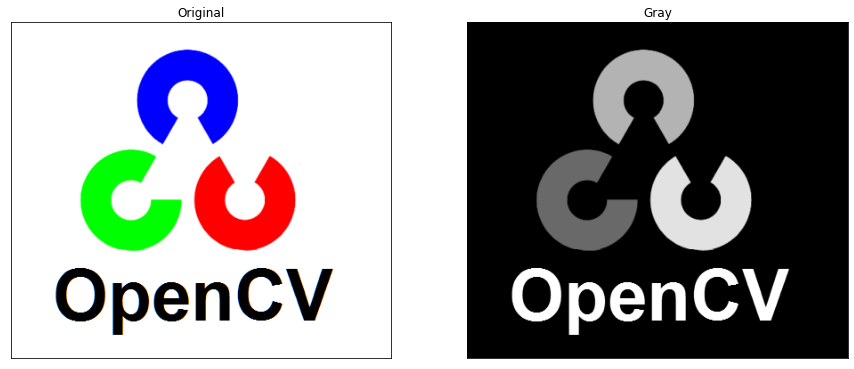

In [2]:
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgray = 255 - imgray

plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(imgray,cmap = 'gray')
plt.title('Gray')
plt.xticks([])
plt.yticks([])

plt.show()

In [3]:
ret, thresh = cv2.threshold(imgray, 8, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
imgcontours = cv2.drawContours(img, contours, -1, (128, 128, 128), 3)

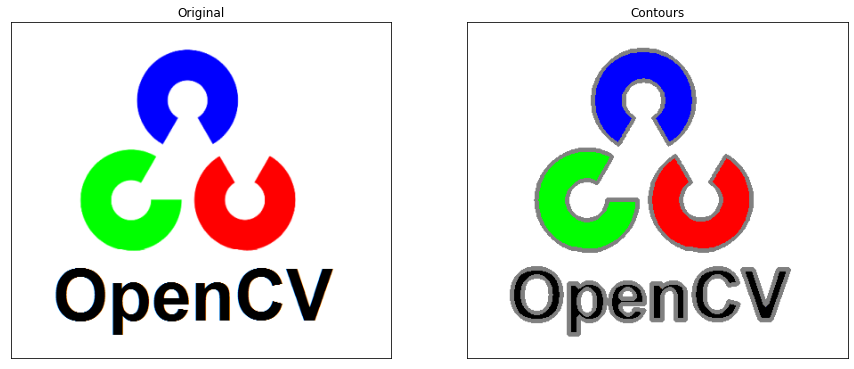

In [4]:
img = cv2.imread(img_path)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(imgcontours)
plt.title("Contours")
plt.xticks([])
plt.yticks([])

plt.show()

In [5]:
cnt = contours[0]
print(cnt.shape)
epsilon = 0.01 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)

(39, 1, 2)


In [6]:
imgcontour = cv2.imread(img_path)
imgcontour = cv2.drawContours(imgcontour, [cnt], -1, (255, 32, 255), 3)
imgapprox = cv2.imread(img_path)
imgapprox = cv2.drawContours(imgapprox, [approx], -1, (255, 32, 255), 3)
img = cv2.imread(img_path)

In [7]:
print(cnt.shape, approx.shape)

(39, 1, 2) (13, 1, 2)


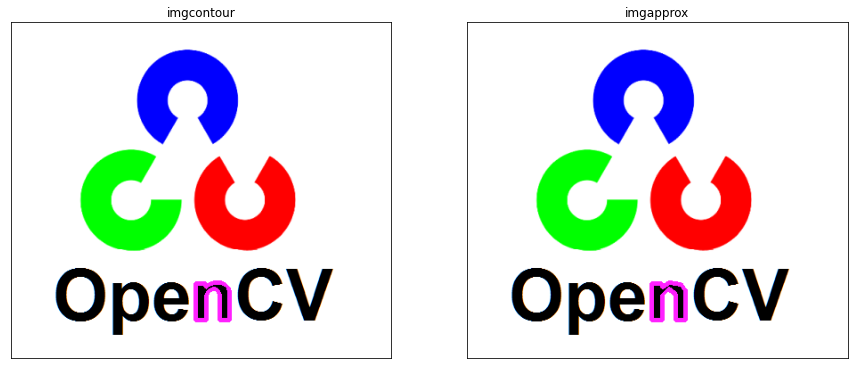

In [8]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(imgcontour)
plt.title("imgcontour")
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(imgapprox, cmap="gray")
plt.title("imgapprox")
plt.xticks([])
plt.yticks([])

plt.show()

In [9]:
hull = cv2.convexHull(approx)

In [10]:
imghull = cv2.imread(img_path)
imghull = cv2.drawContours(imghull, [hull], -1, (255, 32, 255), 3)

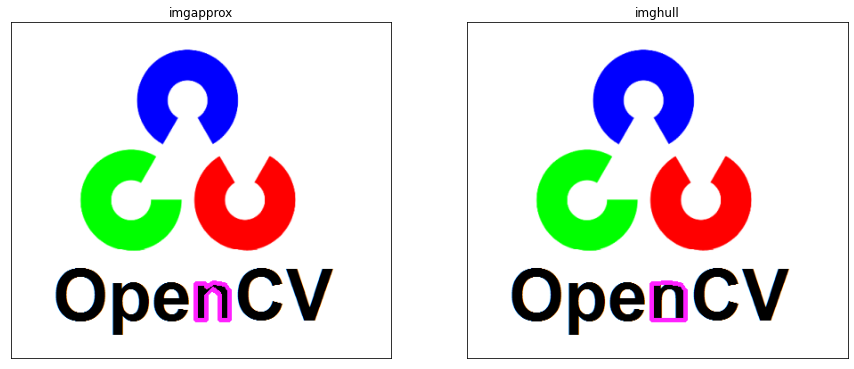

In [11]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(imgapprox)
plt.title("imgapprox")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(imghull, cmap="gray")
plt.title("imghull")
plt.xticks([])
plt.yticks([])

plt.show()

In [12]:
imgcontour = cv2.imread(img_path)
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
imgcontour = cv2.drawContours(imgcontour, [box], 0, (0, 0, 255), 2)

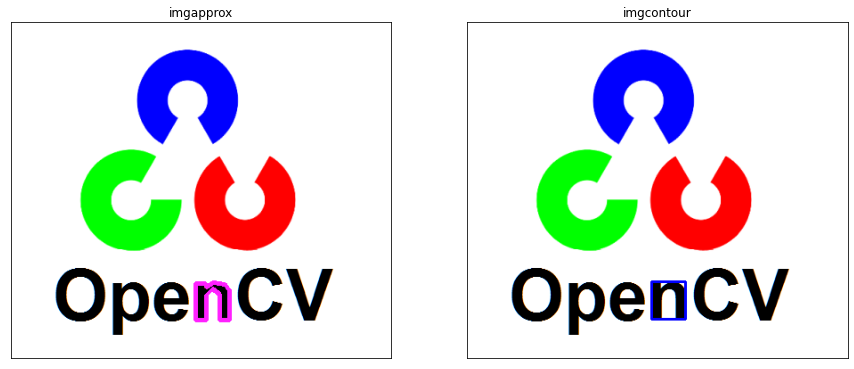

In [13]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(imgapprox)
plt.title("imgapprox")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(imgcontour, cmap="gray")
plt.title("imgcontour")
plt.xticks([])
plt.yticks([])

plt.show()

In [14]:
cnt = contours[9]
M = cv2.moments(cnt)
print(M)

{'m00': 7239.0, 'm10': 1898715.1666666665, 'm01': 1505439.8333333333, 'm20': 505868986.3333333, 'm11': 394843197.9166666, 'm02': 318281254.6666666, 'm30': 136804001757.65001, 'm21': 105140250741.13333, 'm12': 83475267517.63333, 'm03': 68337049063.65, 'mu20': 7855547.44259876, 'mu11': -18170.235583484173, 'mu02': 5206369.767275214, 'mu30': -1083314.992111206, 'mu21': -51947389.87743616, 'mu12': 928919.9763679504, 'mu03': -18943732.032806396, 'nu20': 0.14990609896305146, 'nu11': -0.0003467395688795744, 'nu02': 0.0993522841373363, 'nu30': -0.00024297316554020574, 'nu21': -0.011651109651380352, 'nu12': 0.00020834441398415065, 'nu03': -0.0042488275087804485}


In [15]:
cx = int(M["m10"] / M["m00"])
cy = int(M["m01"] / M["m00"])

In [16]:
area = cv2.contourArea(cnt)

In [17]:
perimeter = cv2.arcLength(cnt, True)

In [18]:
imginfo = cv2.imread(img_path)
imginfo = cv2.circle(imginfo, (cx, cy), 5, (0, 0, 255), -1)
font = cv2.FONT_HERSHEY_SIMPLEX
msg = "A" + str(area) + "L" + str(perimeter)
imginfo = cv2.putText(imginfo, msg, (cx, cy), font, 1, (32, 32, 32), 2, cv2.LINE_AA)

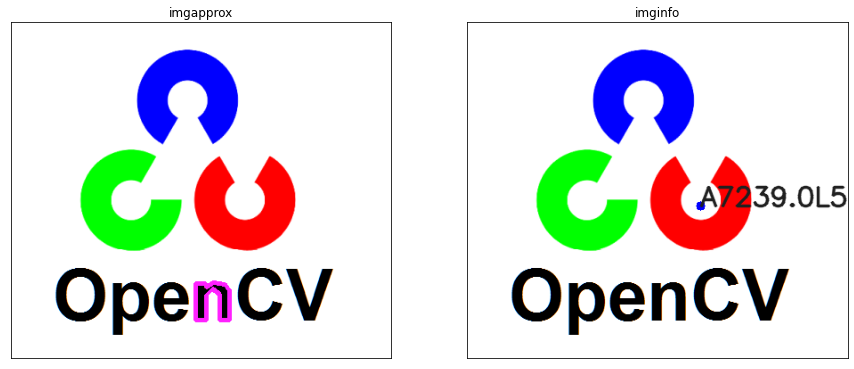

In [19]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(imgapprox)
plt.title("imgapprox")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(imginfo, cmap="gray")
plt.title("imginfo")
plt.xticks([])
plt.yticks([])

plt.show()